# Achraf Safsafi {-}
# DSC650 {-}
# Assignment 5 {-}

# {-}




# Assignment 5.1 : Classifying movie reviews {-}

## The IMDB dataset {-}

#### Loading the IMDB dataset {-}

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:


from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
train_labels[0]

1

##### No word ndex will exceed 10,000 {-}

In [5]:
max([max(sequence) for sequence in train_data])

9999

##### Decode one of these reviews back to English words {-}

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Preparing the data {-}

#### Encoding the integer sequences into a binary matrix {-}

In [7]:

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. 
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Building our network {-}

#### The model definition {-}

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#### Compiling the model {-}

In [10]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Configuring the optimizer {-}

In [11]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Using custom losses and metrics {-}

In [12]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## Validating our approach {-}

#### Setting aside a validation set {-}

In [13]:

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Training our model {-}

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.6099 - binary_accuracy: 0.6801 - val_loss: 0.3972 - val_binary_accuracy: 0.8700
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3336 - binary_accuracy: 0.9005 - val_loss: 0.3558 - val_binary_accuracy: 0.8578
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2402 - binary_accuracy: 0.9264 - val_loss: 0.3086 - val_binary_accuracy: 0.8749
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1872 - binary_accuracy: 0.9401 - val_loss: 0.2730 - val_binary_accuracy: 0.8916
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1453 - binary_accuracy: 0.9564 - val_loss: 0.3039 - val_binary_accuracy: 0.8803
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1189 - binary_accuracy: 0.9652 - val_loss: 0.2917 - val_binary_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - los

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

#### Plotting the training and validation loss {-}

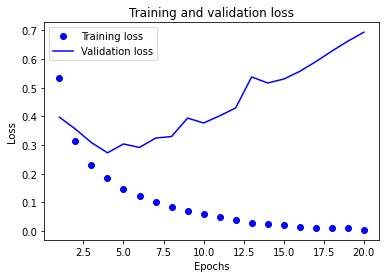

In [16]:

import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Plotting the training and validation accuracy {-}

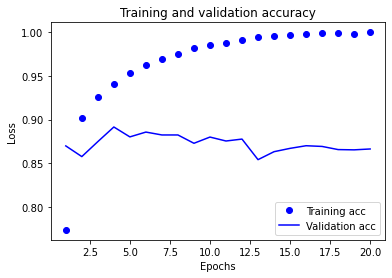

In [17]:
plt.clf()  
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Retraining a model from scratch {-}

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.5778 - accuracy: 0.7230
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2876 - accuracy: 0.9055
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2098 - accuracy: 0.9262
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2996 - accuracy: 0.8798


In [19]:
results

[0.29959574341773987, 0.8797600269317627]

## Using a trained network to generate predictions on new data {-}

In [20]:
model.predict(x_test)

array([[0.16862705],
       [0.9999273 ],
       [0.8069594 ],
       ...,
       [0.07418606],
       [0.06543425],
       [0.4470158 ]], dtype=float32)

# {-}

# Assignment 5.2 : Classifying newswires {-}

## The Reuters dataset {-}

#### Loading the Reuters dataset {-}

In [21]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [22]:
len(train_data)

8982

In [23]:
len(test_data)

2246

In [24]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


#### Decoding newswires back to text {-}

In [25]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [26]:
train_labels[10]

3

## Preparing the data {-}

#### Encoding the data {-}

In [27]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [28]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [29]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## Building our network {-}

#### Model definition {-}

In [30]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

#### Compiling the model {-}

In [31]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Validating our approach {-}

#### Setting aside a validation set {-}

In [32]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

#### Training the model {-}

In [33]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 29ms/step - loss: 3.0710 - accuracy: 0.4364 - val_loss: 1.6837 - val_accuracy: 0.6370
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.4674 - accuracy: 0.6899 - val_loss: 1.2818 - val_accuracy: 0.7150
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.0750 - accuracy: 0.7643 - val_loss: 1.1426 - val_accuracy: 0.7390
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8202 - accuracy: 0.8278 - val_loss: 1.0368 - val_accuracy: 0.7700
Epoch 5/20
16/16 [==============================] - 0s 21ms/step - loss: 0.6546 - accuracy: 0.8640 - val_loss: 0.9590 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5272 - accuracy: 0.8964 - val_loss: 0.9218 - val_accuracy: 0.7990
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4383 - accuracy: 0.9109 - val_loss: 0.9115 - val_accuracy: 0.8080
Epoch 8/20
16

#### Plotting the training and validation loss {-}

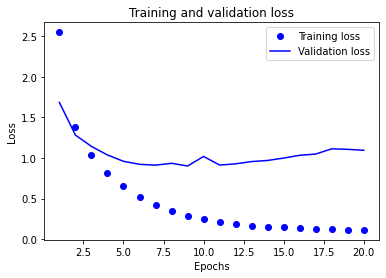

In [34]:

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Plotting the training and validation accuracy {-}

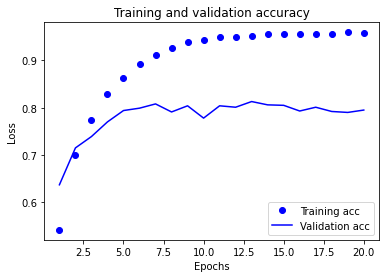

In [35]:
plt.clf()   
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Retraining a model from scratch {-}

In [36]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 1s 25ms/step - loss: 3.1525 - accuracy: 0.3970 - val_loss: 1.7930 - val_accuracy: 0.6240
Epoch 2/8
16/16 [==============================] - 0s 16ms/step - loss: 1.5477 - accuracy: 0.6829 - val_loss: 1.3402 - val_accuracy: 0.6980
Epoch 3/8
16/16 [==============================] - 0s 16ms/step - loss: 1.1257 - accuracy: 0.7537 - val_loss: 1.1730 - val_accuracy: 0.7380
Epoch 4/8
16/16 [==============================] - 0s 18ms/step - loss: 0.8850 - accuracy: 0.8123 - val_loss: 1.0582 - val_accuracy: 0.7710
Epoch 5/8
16/16 [==============================] - 0s 15ms/step - loss: 0.7280 - accuracy: 0.8466 - val_loss: 0.9824 - val_accuracy: 0.7870
Epoch 6/8
16/16 [==============================] - 0s 16ms/step - loss: 0.5632 - accuracy: 0.8823 - val_loss: 0.9400 - val_accuracy: 0.8100
Epoch 7/8
16/16 [==============================] - 0s 16ms/step - loss: 0.4505 - accuracy: 0.9103 - val_loss: 0.8879 - val_accuracy: 0.8200
Epoch 8/8
71/71 [===

In [37]:
results

[0.9783440828323364, 0.7871772050857544]

##### The accuracy reached by the random classifier is about 19% {-}

In [38]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.19545859305431879

## Generating predictions on new data {-}

#### Generating predictions for new data {-}

In [39]:
predictions = model.predict(x_test)

##### Each entry in predictions is a vector of length 46: {-}

In [40]:
predictions[0].shape

(46,)

##### The coefficients in this vector sum to 1: {-}

In [41]:
np.sum(predictions[0])

0.9999999

##### The largest entry is the predicted class—the class with the highest probability: {-}

In [42]:
np.argmax(predictions[0])

3

## A different way to handle the labels and the loss {-}

In [43]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [44]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

##  The importance of having sufficiently large intermediate layers {-}

#### A model with an information bottleneck {-}

In [45]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 14ms/step - loss: 3.5529 - accuracy: 0.1590 - val_loss: 2.7013 - val_accuracy: 0.2520
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 2.4127 - accuracy: 0.3419 - val_loss: 1.8286 - val_accuracy: 0.5450
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 1.6928 - accuracy: 0.5567 - val_loss: 1.5804 - val_accuracy: 0.5720
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.3713 - accuracy: 0.6072 - val_loss: 1.4630 - val_accuracy: 0.6480
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 1.2216 - accuracy: 0.6859 - val_loss: 1.3901 - val_accuracy: 0.6760
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0505 - accuracy: 0.7205 - val_loss: 1.3382 - val_accuracy: 0.6910
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.9709 - accuracy: 0.7533 - val_loss: 1.3063 - val_accuracy: 0.7030
Epoch 8/20
63/63 [=

# {-}

# Assignment 5.3 : Predicting house prices {-}

## The Boston Housing Price dataset {-}

####  Loading the Boston housing dataset {-}

In [46]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [47]:
train_data.shape

(404, 13)

In [48]:
test_data.shape

(102, 13)

In [49]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

## Preparing the data {-}

#### Normalizing the data {-}

In [50]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

## Building our network {-}

#### Model definition {-}

In [51]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

## Validating our approach using K-fold validation {-}

#### K-fold validation {-}

In [52]:

import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
  
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)

    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [53]:
all_scores

[2.2719955444335938, 2.6824657917022705, 2.980651617050171, 2.458961248397827]

In [54]:
np.mean(all_scores)

2.5985185503959656

#### Saving the validation logs at each fold {-}

In [55]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


#### Building the history of successive mean K-fold validation scores {-}

In [56]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

#### Plotting validation scores {-}

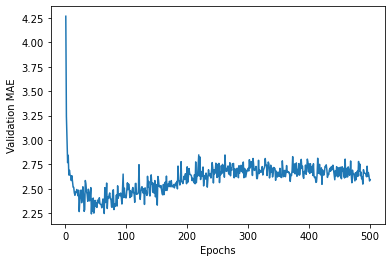

In [57]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

#### Plotting validation scores, excluding the first 10 data points {-}

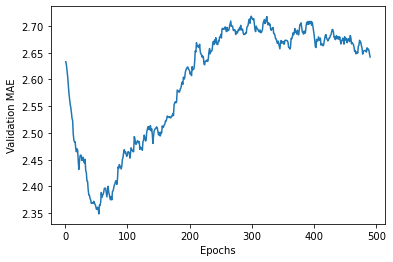

In [58]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

#### Training the final model {-}

In [59]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 18.5483 - mae: 2.6491


In [60]:
test_mae_score

2.6490962505340576